# КН-32 Рачинська Анастасія

## Лабораторна робота №1 “Linear Regression”

Мета: навчитись реалізовувати лінійну регресію та градієнтний спуск.

Завдання:
1. Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
2. Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
    - Візуалізувати дані з lab1_train.csv.
    - Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
    - Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
    - Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.

## Хід роботи

Для початку заванатжимо всі необхідні бібліотеки:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Тепер викачаємо дані з тренувального сету "lab_1_train.csv":

In [19]:
train_data = np.loadtxt("lab_1_train.csv", delimiter=",", skiprows=1)
train_data_processed = train_data[:,[1,2]]

Візуалізуємо дані з lab1_train.csv:

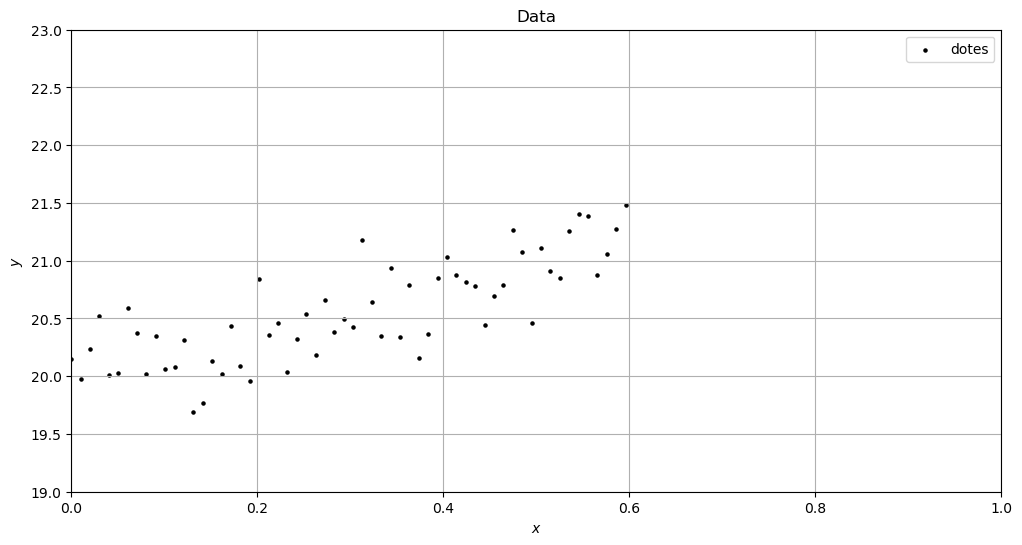

In [20]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(0,1)
ax.set_ylim(19,23)
x_vals_train = [i[0] for i in train_data_processed] 
y_vals_train = [i[1] for i in train_data_processed]
ax.scatter(x_vals_train, y_vals_train, zorder=1, color='black', label="dotes", s=5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Data')
plt.legend()
plt.show(block=False)

Далі пропишемо функції MeanSquareError та реалізуємо лінійну регресію з градієнтним спуском:

In [26]:
def MeanSquareError(data, b0, b1):
    return sum((y - (b0 + b1 * x))**2 for x, y in data) / data.shape[0]
    
def LinearRegression(data, b0, b1, alfa, epsilon):
    # порахуємо функцію втрат для початкових даних
    prev_cost = MeanSquareError(data, b0, b1)

    # забезпечимо вхід у цикл, що підбиратиме найкращі коефіцієнти
    new_cost = prev_cost - 2 * epsilon

    # new_b0, new_b1 = prev_b0, prev_b1
    m = data.shape[0]

    # число ітерацій
    n=0

    # основний цикл роботи
    while abs(prev_cost - new_cost) > epsilon:
        n += 1

        # розрахунок частини формули з сумою
        temp_sum_for_b0 = temp_sum_for_b1 = 0
        for i in range(m):
            temp = data[i][1] - (b0 + b1 * data[i][0])
            temp_sum_for_b0 += temp
            temp_sum_for_b1 += temp * data[i][0]

        # основні розрахунки за формулою
        b0 = b0 + alfa * temp_sum_for_b0 / m
        b1 = b1 + alfa * temp_sum_for_b1 / m

        # підготовка до наступної ітерації
        prev_cost = new_cost
        new_cost = MeanSquareError(data, b0, b1)

        print(f"n = {n} cost_func = {new_cost:.5f} when b0 = {b0:.5f} and b1 = {b1:.5f}")
        
    return b0, b1

Запустимо функцію лінійної регресії для пошуку параметрів b0, b1:

In [27]:
b0, b1 = LinearRegression(train_data_processed, 22, 3, 0.1, 0.0001)

n = 1 cost_func = 4.46109 when b0 = 21.76556 and b1 = 2.92702
n = 2 cost_func = 3.55637 when b0 = 21.55674 and b1 = 2.86189
n = 3 cost_func = 2.83835 when b0 = 21.37075 and b1 = 2.80377
n = 4 cost_func = 2.26849 when b0 = 21.20508 and b1 = 2.75188
n = 5 cost_func = 1.81622 when b0 = 21.05753 and b1 = 2.70554
n = 6 cost_func = 1.45728 when b0 = 20.92611 and b1 = 2.66416
n = 7 cost_func = 1.17241 when b0 = 20.80907 and b1 = 2.62719
n = 8 cost_func = 0.94632 when b0 = 20.70484 and b1 = 2.59414
n = 9 cost_func = 0.76688 when b0 = 20.61201 and b1 = 2.56460
n = 10 cost_func = 0.62446 when b0 = 20.52934 and b1 = 2.53817
n = 11 cost_func = 0.51143 when b0 = 20.45573 and b1 = 2.51453
n = 12 cost_func = 0.42172 when b0 = 20.39019 and b1 = 2.49336
n = 13 cost_func = 0.35052 when b0 = 20.33183 and b1 = 2.47439
n = 14 cost_func = 0.29401 when b0 = 20.27987 and b1 = 2.45739
n = 15 cost_func = 0.24915 when b0 = 20.23361 and b1 = 2.44215
n = 16 cost_func = 0.21355 when b0 = 20.19244 and b1 = 2.42846
n

Тепер зчитаємо дані з "lab_1_test.csv":

In [28]:
test_data = np.loadtxt("lab_1_test.csv", delimiter=",", skiprows=1)
test_data_processed = test_data[:,[1,2]]

Для перевірки якості вже натренованої моделі порахуємо test_error:

In [29]:
test_error = MeanSquareError(test_data_processed, b0, b1)
print(test_error)

0.09224735629713271


Візуалізуємо результати:

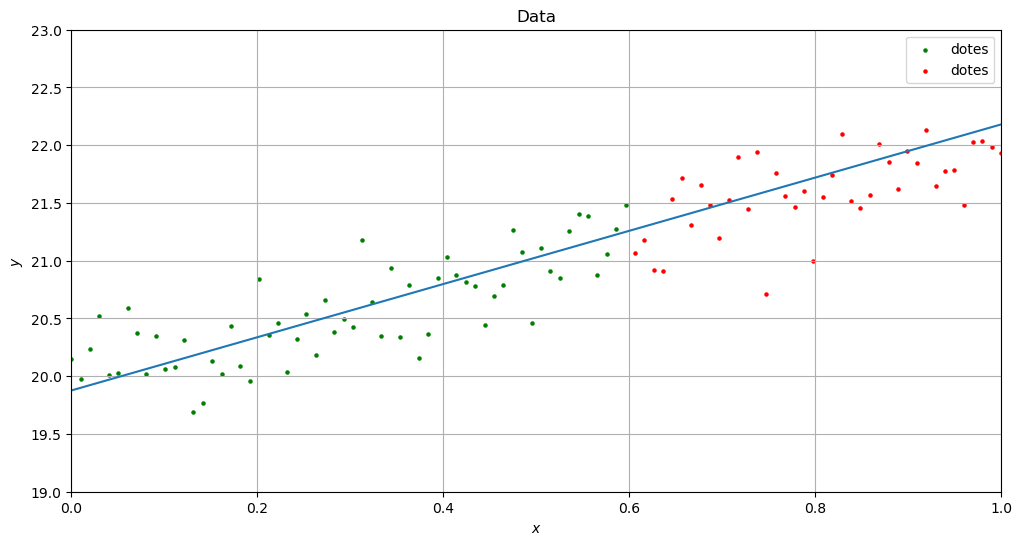

In [30]:
x = np.linspace(0,1,2)
y = b0 + b1 * x
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_xlim(0,1)
ax.set_ylim(19,23)
x_vals_test = [i[0] for i in test_data_processed] 
y_vals_test = [i[1] for i in test_data_processed]
ax.scatter(x_vals_train, y_vals_train, zorder=1, color='green', label="dotes", s=5)
ax.scatter(x_vals_test, y_vals_test, zorder=1, color='red', label="dotes", s=5)
plt.plot(x,y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Data')
plt.legend()
plt.show(block=False)

## Висновок
Отже, у ході лабораторної роботи було реалізовано лінійну регресію з градієнтним спуском. Модель було натреновано на файлі "lab_1_train.csv", а протестовано на "lab_1_test.csv". Унаслідок навчання було отрмано коефіцієнти b0 = 19.87657 та b1 = 2.30400. Для тренувальних даних значення функції втрат при цих вагах становить 0.07646. При тестуванні було отримано значення функції втрат 0.092247, що загалом не сильно перевищує отримане внаслідок навчання. Результати показують, що дані добре генералізуються.